# Life Expectancy

We are going to take a quick tour of machine learning by working on an example dataset. The mushroom dataset
categorizes mushrooms as 'poisonous' or 'edible' and collects several descriptive properties of each mushroom example.

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.options.display.max_rows = 20  # Shows 20 rows
pd.options.display.max_columns = None  # Shows All columns

## Loading the dataset

In [6]:
# These lines would load the data locally
# data_root = "./"
# filename = "Life_Expectancy_Data.csv"
# filepath = os.path.join(data_root, filename)
# df = pd.read_csv(filepath)

# We'll fetch it directly from the web
data_url = "https://aet-cs.github.io/white/ML/lessons/Life_Expectancy_Data.csv"
df = pd.read_csv(data_url)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


`describe` gives a quick overview of each feature

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Data Exploration

Show all the columns. Target is 'Life expectancy'

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Get the size of the dataframe. Shape returns (rows, cols)

In [9]:
target = "Life expectancy"

In [10]:
df.shape

(2938, 22)

Let's get all the data types

In [11]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
                                    ...   
Population                         float64
thinness 1-19 years                float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
Length: 22, dtype: object

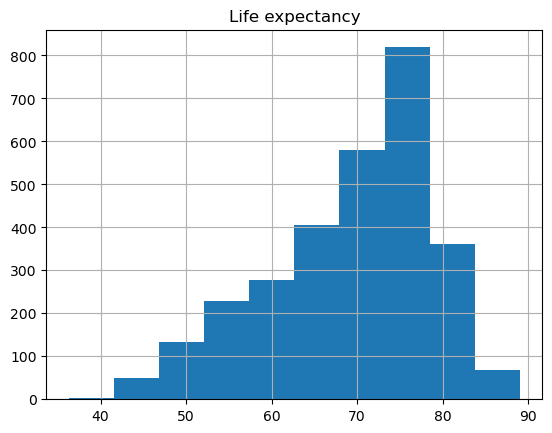

In [12]:
df.hist(target);

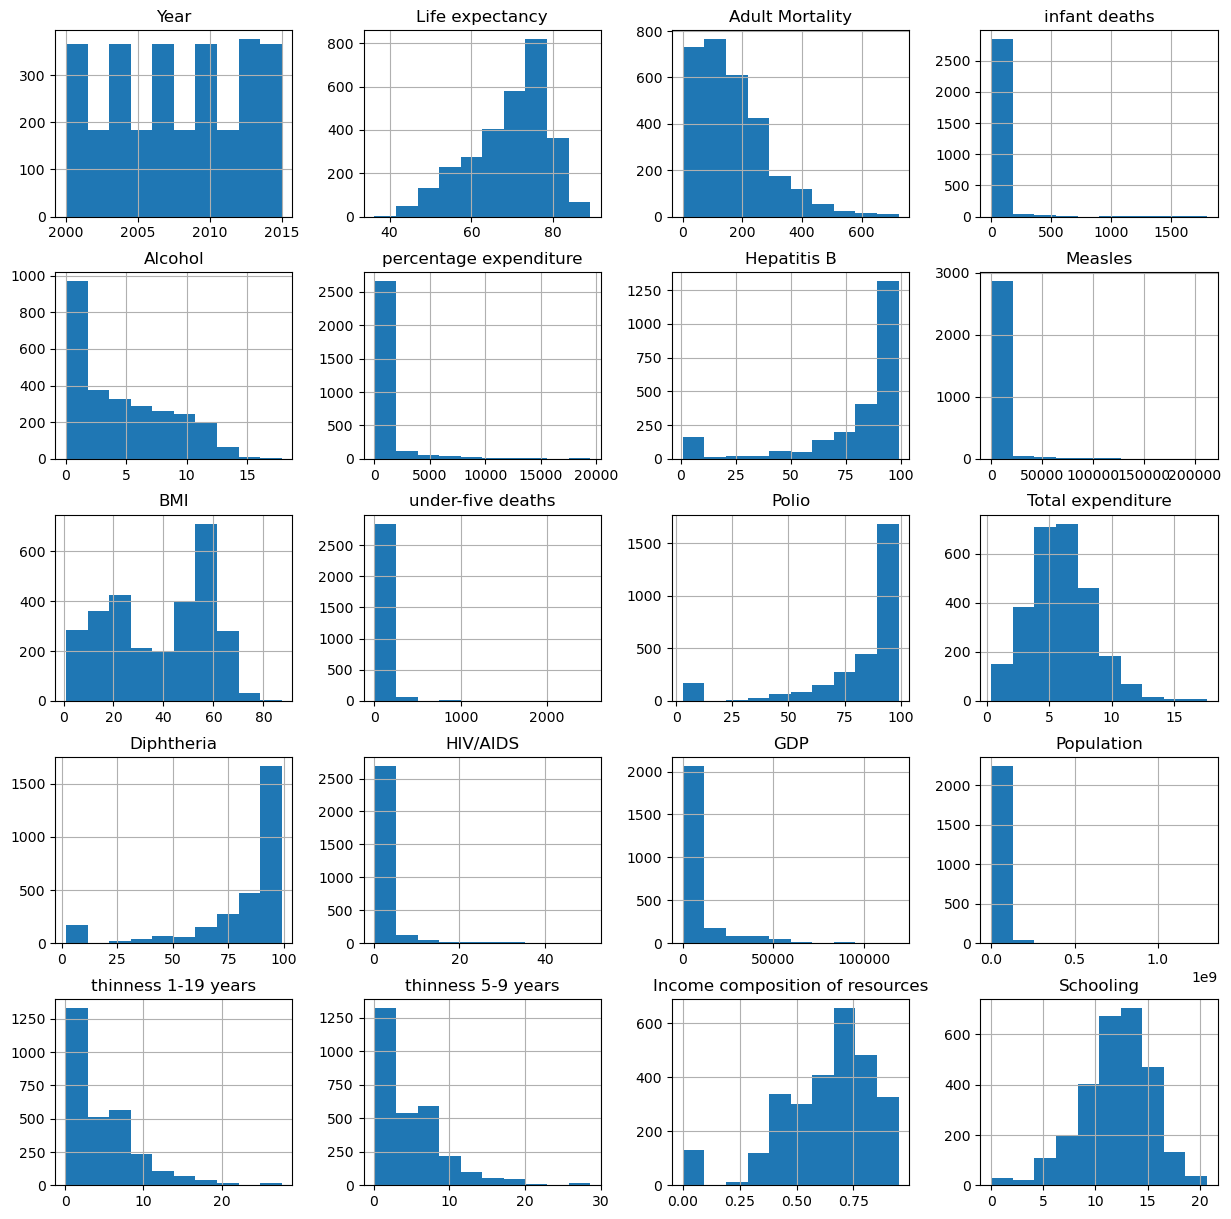

In [14]:
df.hist(figsize=(15,15));

### Correlation matrix heat map

Let's get a quick visual representation of the relationshop between features in this dataset. First drop the categorical attributes. Use a **new name** so we don't pollute the original dataframe

In [15]:
df_heat = df.drop(["Country", "Status"], axis = 1)

In [16]:
corr_matrix = df_heat.corr()

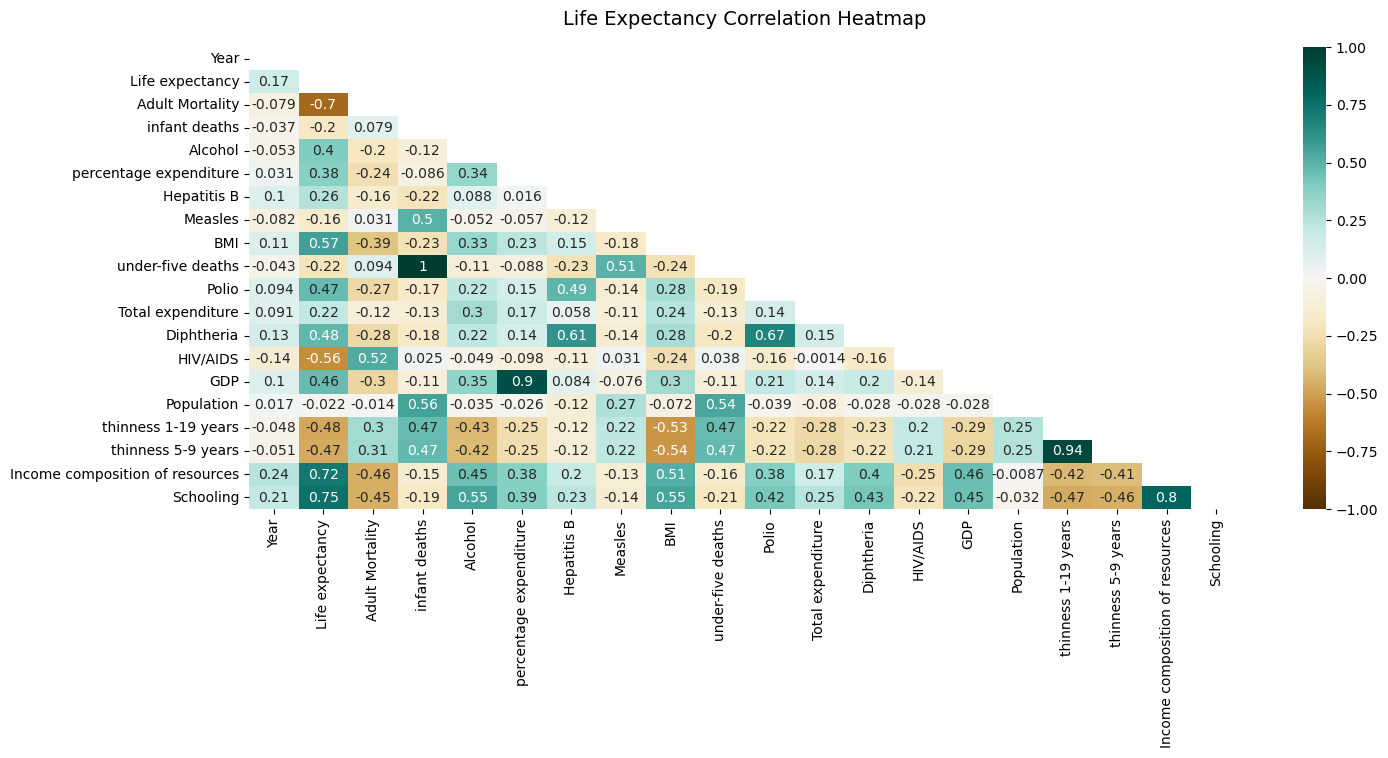

In [17]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Life Expectancy Correlation Heatmap', fontdict={'fontsize':14}, pad=16);
plt.show()

Which features seem to be important?

In [18]:
row_filter = abs(corr_matrix[target])>0.1
top_features = pd.DataFrame(corr_matrix[target][row_filter])
top_features.sort_values(by=target)

,Life expectancy
Adult Mortality,-0.696359
HIV/AIDS,-0.556556
thinness 1-19 years,-0.477183
thinness 5-9 years,-0.471584
under-five deaths,-0.222529
infant deaths,-0.196557
Measles,-0.157586
Year,0.170033
Total expenditure,0.218086
Hepatitis B,0.256762


## Data Modeling

Here we will run a linear regression. First we need to clean up the data a bit. We will create a data pipeline so we can repeat this process as needed.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

### Linear Regression

Three methods will load the data, preprocess it, and create X and y datasets for training and testing.

In [20]:
def get_data(filename):
    df = pd.read_csv(filename)
    return df    

In [21]:

def pre_process_data(df, one_hot_encode = False):
    target = "Life expectancy"    
    simple_median = SimpleImputer(strategy='median')
    simple_most_freq = SimpleImputer(strategy='most_frequent')
    
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(include=object).columns

    df[num_cols] = simple_median.fit_transform(df[num_cols])
    df[cat_cols] = simple_most_freq.fit_transform(df[cat_cols])
    
    if one_hot_encode:
        O_encoder = OrdinalEncoder()
        df[cat_cols]= O_encoder.fit_transform(df[cat_cols])

        # df = pd.get_dummies(df, dtype=int)
        
    return df

In [22]:
def get_test_train(df, test_size = 0.2, random_state = 42):
    target = "Life expectancy"    
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [24]:
df = get_data(data_url)
df = pre_process_data(df, one_hot_encode = True)
X_train, X_test, y_train, y_test = get_test_train(df)

In [25]:
lreg = LinearRegression()
model = lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)
print(f"Train R-squared = {r2_score(lreg.predict(X_train), y_train):5.3}")
print(f"Test R-squared  = {r2_score(y_pred, y_test):5.3}")

Train R-squared = 0.779
Test R-squared  = 0.789


Text(0, 0.5, 'Predicted LE')

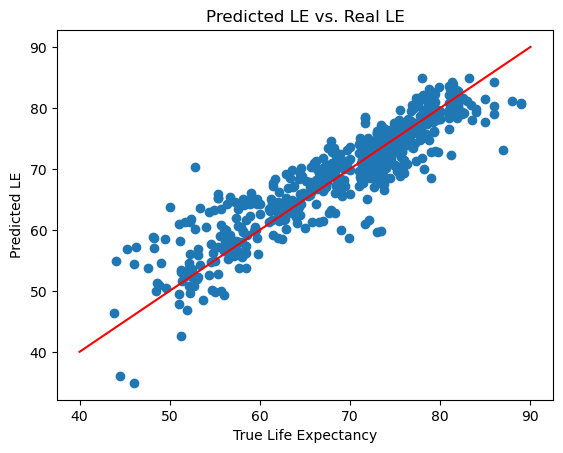

In [26]:
plt.scatter(y_test, y_pred);
plt.plot([40,90],[40,90],color='red')
plt.title("Predicted LE vs. Real LE")
plt.xlabel("True Life Expectancy")
plt.ylabel("Predicted LE")

## Advanced Techniques

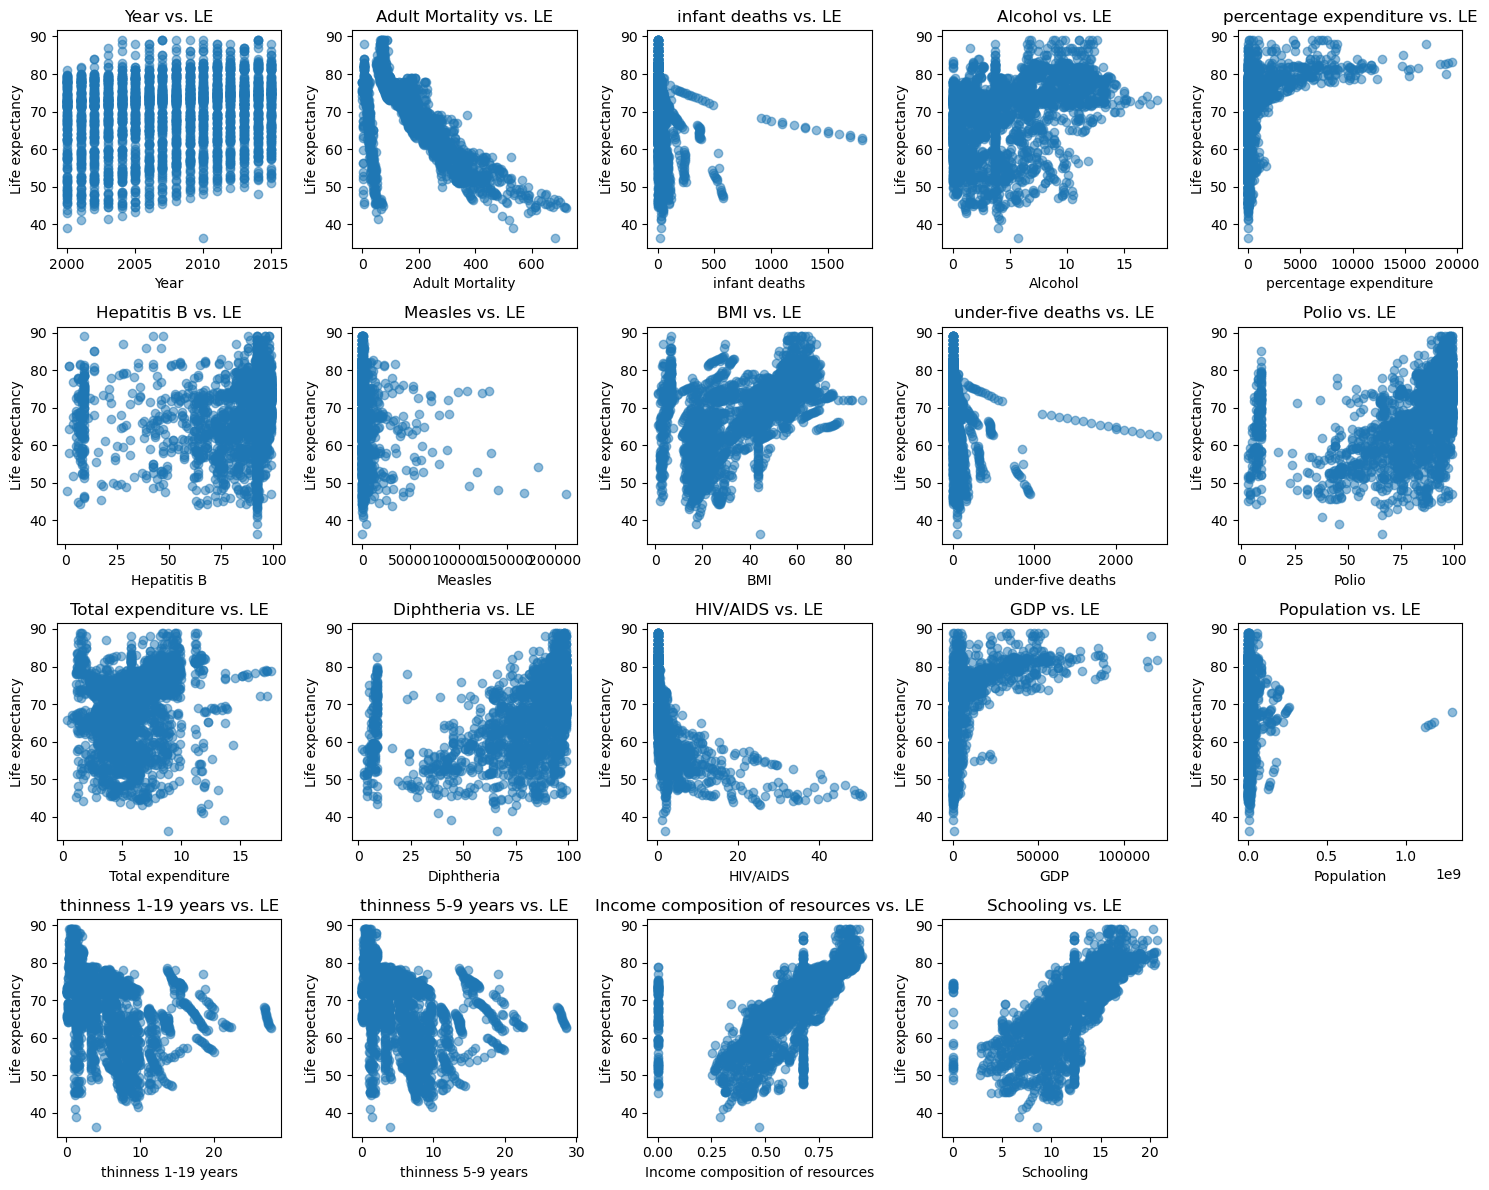

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your DataFrame with 20 numerical features and 'LifeExpectancy' as the target variable
target = 'Life expectancy'
df = get_data(data_url)
df = pre_process_data(df)
features = df.drop(target, axis=1).select_dtypes(include=['number']).columns

# Set up a grid of subplots
num_features = len(features)
num_cols = 5  # Adjust this to your preference
num_rows = (num_features + num_cols - 1) // num_cols  # Calculates rows needed

plt.figure(figsize=(15, num_rows * 3))

for i, feature in enumerate(features, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs. LE')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


## Importance Analysis

In [29]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Get a summary of the regression
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.264e+04
Date:                Tue, 30 Sep 2025   Prob (F-statistic):                        0.00
Time:                        11:43:08   Log-Likelihood:                         -6633.1
No. Observations:                2350   AIC:                                  1.331e+04
Df Residuals:                    2329   BIC:                                  1.343e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [30]:
# Extract the summary table as a DataFrame
summary_table = model.summary2().tables[1]  # tables[1] is the coefficients table in summary2()

# Sort by p-values (for example)
sorted_summary = summary_table.sort_values(by='t')


# Set display options to prevent truncation
pd.options.display.max_rows = None  # Shows all rows
pd.options.display.max_columns = None  # Shows all columns

sorted_summary

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
HIV/AIDS,-4.601333e-01,1.914827e-02,-24.030023,3.570287e-114,-4.976828e-01,-4.225839e-01
Adult Mortality,-2.085955e-02,8.912658e-04,-23.404412,5.650989e-109,-2.260731e-02,-1.911180e-02
under-five deaths,-7.330643e-02,7.035782e-03,-10.419088,7.079332e-25,-8.710348e-02,-5.950938e-02
Status,-1.645908e+00,3.039606e-01,-5.414872,6.762624e-08,-2.241969e+00,-1.049846e+00
Hepatitis B,-1.953515e-02,4.220916e-03,-4.628177,3.891525e-06,-2.781229e-02,-1.125800e-02
Measles,-2.224875e-05,8.564944e-06,-2.597653,9.445463e-03,-3.904446e-05,-5.453040e-06
thinness 1-19 years,-9.635987e-02,5.591426e-02,-1.723351,8.495787e-02,-2.060068e-01,1.328705e-02
Population,-1.231248e-09,2.029104e-09,-0.606794,5.440469e-01,-5.210285e-09,2.747790e-09
thinness 5-9 years,1.276719e-02,5.542218e-02,0.230363,8.178303e-01,-9.591476e-02,1.214491e-01
percentage expenditure,6.842727e-05,1.008844e-04,0.678274,4.976652e-01,-1.294053e-04,2.662598e-04


# Exercises

1. Notice the warning about multicollinearity in the above analysis. This can happen when two or more features in your training set are linearly related. By reading through the computations we already made, find pairs of rows are have a high correlation and drop one from each pair, then rerun the regression in 'statsmodel'. Can you get the error to go away?

2. The categorical variable 'country' was ordinal encoded above, even though I said that was usually not a great thing to do. Modify our preprocessor so that the data is one-hot-encoded and re-run all the subsequent analyses. What effect does this have on the $r^2$?

3. Small models generalize better than large models (generally). Experiment with this dataset and find a small subset of the features that predict the outcome as well as the full set (or *almost* as good, for an imprecise definition of *almost*). You're free to pre-process or transform the data however you'd like.

4. Do your own linear regression!